In [ ]:
pip install nba_api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
import requests
import json
import pandas as pd
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats

In [ ]:
player_dictionary = players.get_players()
players = pd.DataFrame.from_dict(player_dictionary)

In [ ]:
player_name = '''Victor Wembanyama'''
player = players[players['full_name'] == player_name]
player_id = player['id']
player_id

4605    1641705
Name: id, dtype: int64

In [ ]:
career_stats = playercareerstats.PlayerCareerStats(
            player_id = player_id
)
career_stats = pd.DataFrame(career_stats.get_data_frames()[0])
seasons = career_stats['SEASON_ID'].to_list()
seasons

['2023-24']

In [ ]:
game_finder = leaguegamefinder.LeagueGameFinder(
    player_id_nullable = player_id
)

game_finder = pd.DataFrame(game_finder.get_data_frames()[0])
game_finder

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22023,1610612759,SAS,San Antonio Spurs,0022300252,2023-11-26,SAS @ DEN,L,25,22,...,0.857,4,7,11,2,6,4,3,4,-2.0
1,22023,1610612759,SAS,San Antonio Spurs,0022300051,2023-11-24,SAS @ GSW,L,35,22,...,1.000,2,7,9,4,1,2,6,2,0.4
2,22023,1610612759,SAS,San Antonio Spurs,0022300235,2023-11-22,SAS vs. LAC,L,33,22,...,1.000,2,13,15,3,1,3,2,2,-0.6
3,22023,1610612759,SAS,San Antonio Spurs,0022300223,2023-11-20,SAS vs. LAC,L,27,9,...,1.000,0,3,3,4,0,2,1,1,-3.4
4,22023,1610612759,SAS,San Antonio Spurs,0022300206,2023-11-18,SAS vs. MEM,L,31,19,...,0.833,4,9,13,4,1,8,2,5,-1.2
5,22023,1610612759,SAS,San Antonio Spurs,0022300032,2023-11-17,SAS vs. SAC,L,30,27,...,1.000,1,8,9,0,2,0,4,3,-6.2
6,22023,1610612759,SAS,San Antonio Spurs,0022300021,2023-11-14,SAS @ OKC,L,28,8,...,NaN,3,11,14,2,0,2,5,2,-6.2
7,22023,1610612759,SAS,San Antonio Spurs,0022300184,2023-11-12,SAS vs. MIA,L,34,18,...,NaN,1,10,11,7,1,1,7,3,1.0
8,22023,1610612759,SAS,San Antonio Spurs,0022300013,2023-11-10,SAS vs. MIN,L,35,29,...,0.500,1,8,9,4,1,4,3,5,0.6
9,22023,1610612759,SAS,San Antonio Spurs,0022300161,2023-11-08,SAS @ NYK,L,30,14,...,1.000,4,5,9,2,0,1,3,2,-5.0


In [ ]:
shot_df = pd.DataFrame()

#The following record contains all attempted shots of the regular season and playoffs
for season in seasons:
  shot_details = shotchartdetail.ShotChartDetail(
              team_id = '0',
              player_id = player_id,
              context_measure_simple = 'FGA',
              season_nullable = season,
              season_type_all_star = ['Regular Season', 'Playoffs'])

#We combine the information in a single data frame containing
#all made shots of the seasons
  response = shot_details.get_data_frames()[0]

#Concatenate data frames for all seasons outside the loop
  shot_df = pd.concat([shot_df, response], ignore_index=True)

In [ ]:
shot_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022300013,20,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,1,10,16,...,Center(C),Less Than 8 ft.,1,-4,15,1,1,20231110,SAS,MIN
1,Shot Chart Detail,0022300013,48,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,1,7,32,...,Left Side(L),16-24 ft.,18,-186,29,1,0,20231110,SAS,MIN
2,Shot Chart Detail,0022300013,137,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,1,1,24,...,Left Side Center(LC),24+ ft.,28,-194,210,1,0,20231110,SAS,MIN
3,Shot Chart Detail,0022300013,154,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,1,0,0,...,Center(C),16-24 ft.,17,37,175,1,0,20231110,SAS,MIN
4,Shot Chart Detail,0022300013,173,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,2,11,34,...,Right Side(R),8-16 ft.,13,134,10,1,1,20231110,SAS,MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Shot Chart Detail,0022300252,393,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,3,11,31,...,Left Side(L),16-24 ft.,16,-157,46,1,0,20231126,DEN,SAS
275,Shot Chart Detail,0022300252,417,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,3,9,14,...,Center(C),24+ ft.,26,-26,265,1,0,20231126,DEN,SAS
276,Shot Chart Detail,0022300252,447,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,3,7,33,...,Center(C),16-24 ft.,16,21,163,1,0,20231126,DEN,SAS
277,Shot Chart Detail,0022300252,524,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,3,2,4,...,Center(C),Less Than 8 ft.,0,1,6,1,1,20231126,DEN,SAS


In [ ]:
shot_game_df = shot_df.merge(game_finder, how = 'left', on = 'GAME_ID', suffixes=['_shots', '_games'])
shot_game_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID_shots,TEAM_NAME_shots,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,Shot Chart Detail,0022300013,20,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,1,10,16,...,0.500,1,8,9,4,1,4,3,5,0.6
1,Shot Chart Detail,0022300013,48,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,1,7,32,...,0.500,1,8,9,4,1,4,3,5,0.6
2,Shot Chart Detail,0022300013,137,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,1,1,24,...,0.500,1,8,9,4,1,4,3,5,0.6
3,Shot Chart Detail,0022300013,154,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,1,0,0,...,0.500,1,8,9,4,1,4,3,5,0.6
4,Shot Chart Detail,0022300013,173,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,2,11,34,...,0.500,1,8,9,4,1,4,3,5,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Shot Chart Detail,0022300252,393,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,3,11,31,...,0.857,4,7,11,2,6,4,3,4,-2.0
275,Shot Chart Detail,0022300252,417,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,3,9,14,...,0.857,4,7,11,2,6,4,3,4,-2.0
276,Shot Chart Detail,0022300252,447,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,3,7,33,...,0.857,4,7,11,2,6,4,3,4,-2.0
277,Shot Chart Detail,0022300252,524,1641705,Victor Wembanyama,1610612759,San Antonio Spurs,3,2,4,...,0.857,4,7,11,2,6,4,3,4,-2.0


In [ ]:
shot_game_df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID_shots', 'TEAM_NAME_shots', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG',
       'GAME_DATE_shots', 'HTM', 'VTM', 'SEASON_ID', 'TEAM_ID_games',
       'TEAM_ABBREVIATION', 'TEAM_NAME_games', 'GAME_DATE_games', 'MATCHUP',
       'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PLUS_MINUS'],
      dtype='object')

In [ ]:
shot_df_dist = shot_game_df.groupby(['SEASON_ID', 'SHOT_DISTANCE'])['GAME_EVENT_ID'].agg('count').reset_index()
shot_df_dist['SEASON_ID'] = shot_df_dist['SEASON_ID'].str[1:]
shot_df_dist

,SEASON_ID,SHOT_DISTANCE,GAME_EVENT_ID
0,2023,0,31
1,2023,1,12
2,2023,2,16
3,2023,3,16
4,2023,4,7
5,2023,5,9
6,2023,6,3
7,2023,7,6
8,2023,8,4
9,2023,9,10


In [ ]:
shot_df_to_visualize = shot_df_dist.pivot(index='SEASON_ID', columns='SHOT_DISTANCE', values='GAME_EVENT_ID').fillna(0).reset_index()
shot_df_to_visualize = shot_df_to_visualize.iloc[:,:32]
# shot_df_to_visualize['Total'] = shot_df_to_visualize.iloc[:, -45:].sum(axis=1)
shot_df_to_visualize = shot_df_to_visualize.sort_values('SEASON_ID', ascending = True)
shot_df_to_visualize

SHOT_DISTANCE,SEASON_ID,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,30,33
0,2023,31,12,16,16,7,9,3,6,4,...,1,1,4,9,27,31,12,5,1,1


In [ ]:
shot_df_to_visualize = shot_df_to_visualize.set_index('SEASON_ID')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


Text(0.68, 0.8, 'Victor Wembanyama')

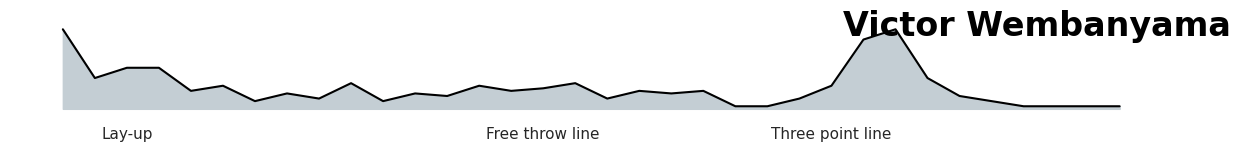

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# url = "https://gist.githubusercontent.com/borgar/31c1e476b8e92a11d7e9/raw/0fae97dab6830ecee185a63c1cee0008f6778ff6/pulsar.csv"
df = shot_df_to_visualize
# # df = pd.read_csv(url, header=None)
df = df.stack().reset_index()
df.columns = ['idx', 'x', 'y']
sns.set_theme(rc={"axes.facecolor": (0, 0, 0, 0), 'figure.facecolor':'#ffffff', 'axes.grid':False})
g = sns.FacetGrid(df, row='idx', aspect=30, height=0.5)
# Draw the densities in a few steps
# g.map(sns.lineplot, 'x', 'y', clip_on=False, alpha=0, linewidth=1)
g.map(plt.fill_between, 'x', 'y', color='#C4CED4')
g.map(sns.lineplot, 'x', 'y', clip_on=False, color='#000000', lw=1.5)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.75, top=1, bottom=-0.75)
g.set_titles('')
g.set(yticks=[])
g.set(xticks=[2, 15, 24])
g.set(xticklabels=['Lay-up', 'Free throw line', 'Three point line'])
g.set(ylabel='')
g.set(xlabel='')
g.despine(bottom=True, left=True)
# Add text to a specific location
plt.text(0.68, 0.80, player_name, transform=g.fig.transFigure, fontsize=24, weight = 'bold', color='#000000')
# plt.savefig('joy.png', facecolor='#ffa600')
# # Add a custom index label to the right side of each subplot
# for ax, label in zip(g.axes[:, -1], df['idx'].unique()):
#     ax.annotate(label, xy=(38, 16), xytext=(0, 0), textcoords='offset points',
#                 ha='left', va='center', color='#000000', fontsize=16, weight = 'bold')